In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df=pd.read_csv("C:/Users/LENOVO/Desktop/Clases/Minería de datos/Github/ProyectoDataMining/defunciones/Defunciones.csv", header = "infer", delimiter = ",", encoding = "latin-1")

C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [112]:
df.head()

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,areag,sexo,diaocu,mesocu,...,dredif,mredif,caudef,asist,ocur,cerdef,escodif,pnadif,predif,ciuodif
0,5,505,1,2009,5,505,9.0,1,2,1,...,1,101,Y214,1,3,1,NaN,NaN,NaN,NaN
1,1,101,9,2009,1,101,9.0,1,27,9,...,1,101,X919,4,3,1,NaN,NaN,NaN,NaN
2,22,2206,9,2009,22,2206,9.0,2,23,8,...,1,101,X959,4,3,2,NaN,NaN,NaN,NaN
3,2,201,12,2009,2,201,9.0,1,5,12,...,1,101,V899,4,3,1,NaN,NaN,NaN,NaN
4,1,101,5,2009,1,101,9.0,2,7,5,...,1,101,X709,4,3,1,NaN,NaN,NaN,NaN


In [113]:
df.isna().sum()

depreg          0
mupreg          0
mesreg          0
añoreg          0
depocu          0
mupocu          0
areag      168671
sexo            0
diaocu          0
mesocu          0
añoocu          0
edadif          0
perdif          0
puedif          0
ecidif          0
ocudif     565215
dnadif          0
mnadif          0
nacdif          0
dredif          0
mredif          0
caudef          0
asist           0
ocur            0
cerdef          0
escodif     71707
pnadif     216809
predif     216809
ciuodif    289466
dtype: int64

In [114]:
len(df)

854681

In [115]:
o=df.isnull()

mask=o.any(axis = 1)

In [116]:
muchos_nas = ["escodif","ciuodif","pnadif","predif","ocudif"]

In [117]:
columnas = df.columns
columnas

Index(['depreg', 'mupreg', 'mesreg', 'añoreg', 'depocu', 'mupocu', 'areag',
       'sexo', 'diaocu', 'mesocu', 'añoocu', 'edadif', 'perdif', 'puedif',
       'ecidif', 'ocudif', 'dnadif', 'mnadif', 'nacdif', 'dredif', 'mredif',
       'caudef', 'asist', 'ocur', 'cerdef', 'escodif', 'pnadif', 'predif',
       'ciuodif'],
      dtype='object')

In [118]:
df["añoreg"].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

In [119]:
df["añoocu"].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [120]:
corr=df.corr(method = 'spearman')

In [121]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,depreg,mupreg,mesreg,añoreg,depocu,mupocu,areag,sexo,diaocu,mesocu,añoocu,edadif,perdif,puedif,ecidif,ocudif,dnadif,nacdif,dredif,mredif,asist,ocur,cerdef,escodif,pnadif,predif
depreg,1.00,0.99,-0.01,0.01,0.99,0.98,0.43,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.18,-0.05,-0.03,0.67,-0.01,0.76,0.76,0.40,0.23,0.27,-0.21,-0.03,-0.02
mupreg,0.99,1.00,-0.01,0.00,0.98,0.98,0.45,0.01,0.00,-0.00,-0.00,-0.01,-0.00,-0.19,-0.05,-0.03,0.66,-0.01,0.75,0.75,0.42,0.26,0.29,-0.22,-0.03,-0.02
mesreg,-0.01,-0.01,1.00,-0.01,-0.01,-0.01,-0.01,0.00,-0.00,0.88,-0.01,0.00,0.00,-0.00,0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,0.01,0.01,-0.00,0.01
añoreg,0.01,0.00,-0.01,1.00,0.01,0.01,-0.02,0.02,0.01,0.00,1.00,0.05,0.01,0.03,-0.02,-0.05,-0.00,0.44,0.04,0.05,0.04,0.15,0.17,-0.03,-0.01,0.06
depocu,0.99,0.98,-0.01,0.01,1.00,0.99,0.43,0.01,0.00,-0.00,0.00,-0.01,-0.01,-0.18,-0.05,-0.03,0.67,-0.01,0.76,0.75,0.41,0.24,0.28,-0.21,-0.02,-0.02
mupocu,0.98,0.98,-0.01,0.01,0.99,1.00,0.45,0.01,0.00,0.00,0.01,-0.00,0.00,-0.19,-0.04,-0.03,0.65,-0.01,0.74,0.74,0.43,0.28,0.29,-0.21,-0.02,-0.02
areag,0.43,0.45,-0.01,-0.02,0.43,0.45,1.00,0.00,0.00,-0.00,-0.02,0.03,0.06,-0.22,-0.02,-0.02,0.22,-0.01,0.29,0.30,0.62,0.51,0.40,-0.19,-0.02,-0.02
sexo,0.01,0.01,0.00,0.02,0.01,0.01,0.00,1.00,0.00,0.00,0.02,0.11,-0.00,-0.02,-0.03,0.33,0.02,-0.00,-0.01,-0.01,-0.03,0.01,0.01,-0.13,-0.03,-0.02
diaocu,0.00,0.00,-0.00,0.01,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
mesocu,-0.00,-0.00,0.88,0.00,-0.00,0.00,-0.00,0.00,0.02,1.00,-0.00,0.01,0.01,-0.01,0.00,-0.01,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.02,0.01,-0.00,0.00


In [134]:
x=np.array([[0],[1],[2],[3],[4]]*6).reshape(30)
y =np.array([[0],[1],[2],[3],[4],[5]]*5).reshape(30)
            


In [143]:
df2 =  df.sample(n = 100000, random_state = 666)

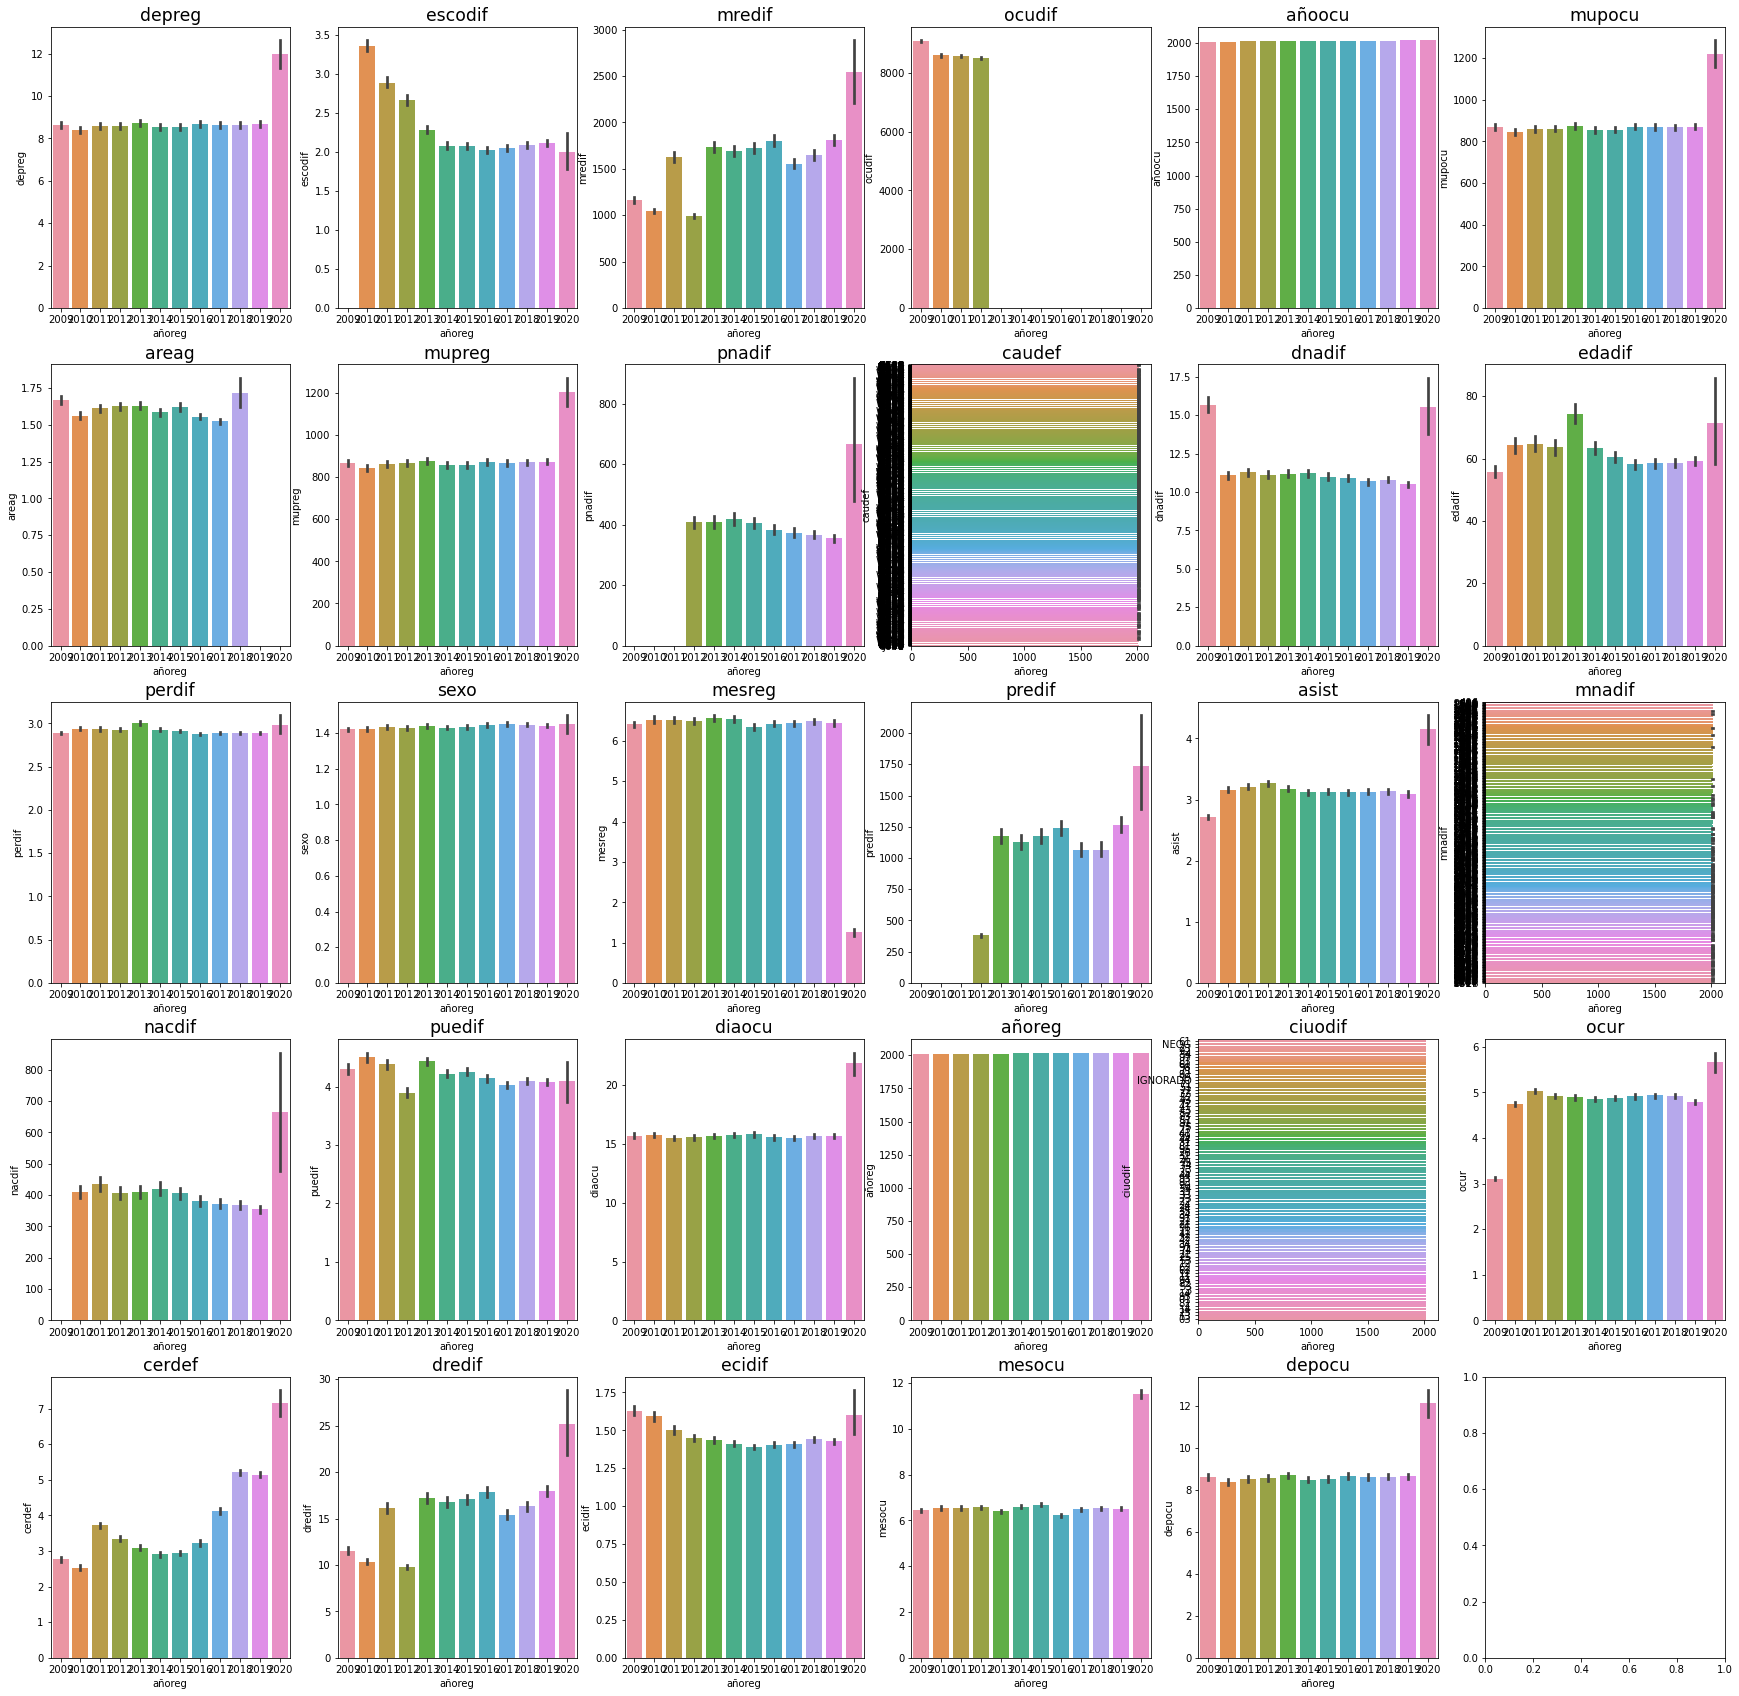

In [153]:
contador = 0
fig, axs = plt.subplots(5,6, figsize=(30,30))
for i in range(0,29):
    sns.barplot(ax = axs[x[i],y[i]],x = df2["añoreg"], y = df2[columnas[i]] )
    axs[x[i],y[i]].set_title(columnas[i], fontsize = "xx-large")
